In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")

In [3]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [8]:
pyber_data = pd.merge(ride_data, city_data, how="left", on=["city"])
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [61]:
pyber_data_rural = pyber_data.loc[(pyber_data["type"] == "Rural")]
pyber_data_rural.head()

,city,date,fare,ride_id,driver_count,type
2282,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2283,Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural
2284,New Johnbury,2016-04-21 08:30:25,56.60,9002881309143,6,Rural
2285,South Joseph,2016-02-17 01:41:29,57.52,7365786843443,3,Rural
2286,Kennethburgh,2016-10-19 13:13:17,24.43,2728236352387,3,Rural


In [86]:
pyber_data_rural_avg_fare = pyber_data_rural.groupby("city").mean()["fare"]
pyber_data_rural_avg_fare = pd.DataFrame(pyber_data_rural_avg_fare)

In [87]:
pyber_data_rural_rides = pyber_data_rural['city'].value_counts()
pyber_data_rural_rides = pd.DataFrame(pyber_data_rural_rides)
pyber_data_rural_rides.index.name = 'city'
pyber_data_rural_rides.rename(columns={'city' : 'ride_count'}, inplace=True)

In [100]:
pyber_data_rural_drivers = city_data.loc[(city_data["type"] == "Rural")].set_index("city").iloc[:,0]
pyber_data_rural_drivers = pd.DataFrame(pyber_data_rural_drivers)

In [101]:
clean_pyber_data_rural = pd.merge(pyber_data_rural_avg_fare, pyber_data_rural_rides, how='outer', left_index=True, right_index=True)

In [102]:
clean_pyber_data_rural = pd.merge(clean_pyber_data_rural, pyber_data_rural_drivers, how='outer', left_index=True, right_index=True)

In [213]:
clean_pyber_data_rural.rename(columns={'fare' : 'avg_fare'}, inplace=True)
clean_pyber_data_rural.head()

,avg_fare,ride_count,driver_count
city,,,
East Leslie,33.660909,11,9
East Stephen,39.053000,10,6
East Troybury,33.244286,7,3
Erikport,30.043750,8,3
Hernandezshire,32.002222,9,10


In [163]:
pyber_data_urban = pyber_data.loc[(pyber_data["type"] == "Urban")]
pyber_data_urban.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [164]:
pyber_data_urban_avg_fare = pyber_data_urban.groupby("city").mean()["fare"]
pyber_data_urban_avg_fare = pd.DataFrame(pyber_data_urban_avg_fare)

In [165]:
pyber_data_urban_rides = pyber_data_urban['city'].value_counts()
pyber_data_urban_rides = pd.DataFrame(pyber_data_urban_rides)
pyber_data_urban_rides.index.name = 'city'
pyber_data_urban_rides.rename(columns={'city' : 'ride_count'}, inplace=True)

In [166]:
pyber_data_urban_drivers = city_data.loc[(city_data["type"] == "Urban")].set_index("city").iloc[:,0]
pyber_data_urban_drivers = pd.DataFrame(pyber_data_urban_drivers)

In [167]:
clean_pyber_data_urban = pd.merge(pyber_data_urban_avg_fare, pyber_data_urban_rides, how='outer', left_index=True, right_index=True)

In [168]:
clean_pyber_data_urban = pd.merge(clean_pyber_data_urban, pyber_data_urban_drivers, how='outer', left_index=True, right_index=True)

In [170]:
clean_pyber_data_urban.rename(columns={'fare' : 'avg_fare'}, inplace=True)
clean_pyber_data_urban.head()

,avg_fare,ride_count,driver_count
city,,,
Alvarezhaven,23.928710,31,21
Alyssaberg,20.609615,26,67
Antoniomouth,23.625000,22,21
Aprilchester,21.981579,19,49
Arnoldview,25.106452,31,41


In [171]:
pyber_data_suburban = pyber_data.loc[(pyber_data["type"] == "Suburban")]
pyber_data_suburban.head()
pyber_data_suburban_avg_fare = pyber_data_suburban.groupby("city").mean()["fare"]
pyber_data_suburban_avg_fare = pd.DataFrame(pyber_data_suburban_avg_fare)
pyber_data_suburban_rides = pyber_data_suburban['city'].value_counts()
pyber_data_suburban_rides = pd.DataFrame(pyber_data_suburban_rides)
pyber_data_suburban_rides.index.name = 'city'
pyber_data_suburban_rides.rename(columns={'city' : 'ride_count'}, inplace=True)
pyber_data_suburban_drivers = city_data.loc[(city_data["type"] == "Suburban")].set_index("city").iloc[:,0]
pyber_data_suburban_drivers = pd.DataFrame(pyber_data_suburban_drivers)
clean_pyber_data_suburban = pd.merge(pyber_data_suburban_avg_fare, pyber_data_suburban_rides, how='outer', left_index=True, right_index=True)
clean_pyber_data_suburban = pd.merge(clean_pyber_data_suburban, pyber_data_suburban_drivers, how='outer', left_index=True, right_index=True)
clean_pyber_data_suburban.rename(columns={'fare' : 'avg_fare'}, inplace=True)
clean_pyber_data_suburban.head()

,avg_fare,ride_count,driver_count
city,,,
Anitamouth,37.315556,9,16
Campbellport,33.711333,15,26
Carrollbury,36.606000,10,4
Clarkstad,31.051667,12,21
Conwaymouth,34.591818,11,18


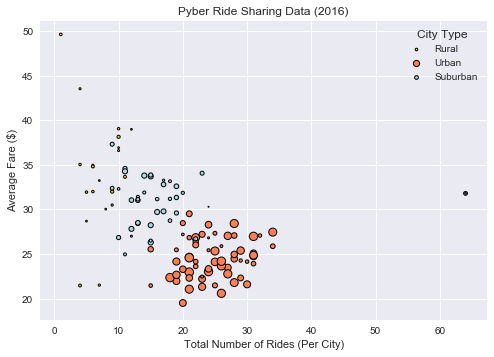

In [189]:
x_rural = clean_pyber_data_rural['ride_count']
x_urban = clean_pyber_data_urban['ride_count']
x_suburban = clean_pyber_data_suburban['ride_count']

y_rural = clean_pyber_data_rural['avg_fare']
y_urban = clean_pyber_data_urban['avg_fare']
y_suburban = clean_pyber_data_suburban['avg_fare']

s_rural = clean_pyber_data_rural['driver_count']
s_urban = clean_pyber_data_urban['driver_count']
s_suburban = clean_pyber_data_suburban['driver_count']

rural = plt.scatter(x_rural, y_rural, s_rural, c='gold', linewidths=1, edgecolors="black")
urban = plt.scatter(x_urban, y_urban, s_urban, c='coral', linewidths=1, edgecolors="black")
suburban = plt.scatter(x_suburban, y_suburban, s_suburban, c='lightblue', linewidths=1, edgecolors="black")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend((rural, urban, suburban), 
           ('Rural','Urban','Suburban'),
           title = "City Type")
sns.set
plt.show()

## % of Total Drivers by City Type

In [216]:
total_drivers = pyber_data.groupby('type').sum()['driver_count']
total_drivers = pd.DataFrame(total_drivers)
total_drivers

,driver_count
type,
Rural,727
Suburban,9730
Urban,64501


In [192]:
total_drivers_urban = (city_data.loc[city_data["type"] == "Urban"]).sum()["driver_count"]
total_drivers_suburban = (city_data.loc[city_data["type"] == "Suburban"]).sum()["driver_count"]
total_drivers_rural = (city_data.loc[city_data["type"] == "Rural"]).sum()["driver_count"]

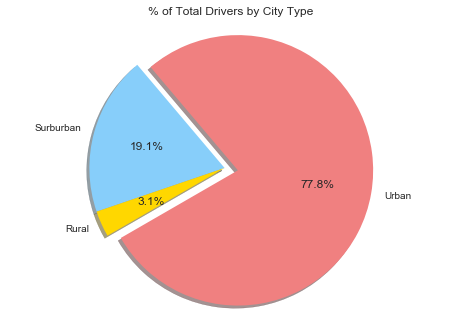

In [193]:
total_drivers_pie_labels = ["Urban", "Surburban", "Rural"]
total_drivers_pie_sizes = [total_drivers_urban, total_drivers_suburban, total_drivers_rural]
total_drivers_pie_colors = ["lightcoral", "lightskyblue", "gold"]
total_drivers_pie_explode = (0.1, 0, 0)
plt.pie(total_drivers_pie_sizes, 
        explode=total_drivers_pie_explode, 
        labels=total_drivers_pie_labels, 
        colors=total_drivers_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.title('% of Total Drivers by City Type')
plt.show()

## % of Total Rides by City Type

In [217]:
total_rides = pyber_data.groupby("type").size().to_frame(name='total_rides')
total_rides

,total_rides
type,
Rural,125
Suburban,657
Urban,1625


In [201]:
total_rides_urban = total_rides.iloc[2]
total_rides_suburban = total_rides.iloc[1]
total_rides_rural = total_rides.iloc[0]

counts    1625
Name: Urban, dtype: int64

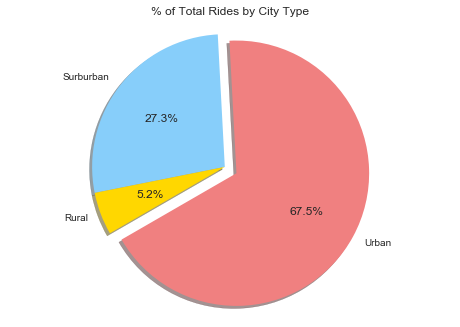

In [202]:
total_rides_pie_labels = ["Urban", "Surburban", "Rural"]
total_rides_pie_sizes = [total_rides_urban, total_rides_suburban, total_rides_rural]
total_rides_pie_colors = ["lightcoral", "lightskyblue", "gold"]
total_rides_pie_explode = (0.1, 0, 0)
plt.pie(total_rides_pie_sizes, 
        explode=total_rides_pie_explode, 
        labels=total_rides_pie_labels, 
        colors=total_rides_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.title('% of Total Rides by City Type')
plt.show()

## % of Total Fares by City Type

In [207]:
total_fares = pyber_data.groupby(['type']).sum()['fare'] 
total_fares = pd.DataFrame(total_fares)
total_fares

,fare
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


In [209]:
total_fares_urban = total_fares.iloc[2]
total_fares_suburban = total_fares.iloc[1]
total_fares_rural = total_fares.iloc[0]

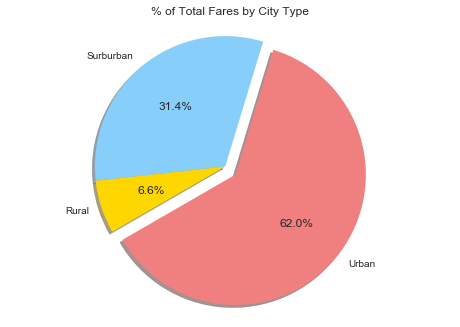

In [212]:
total_fares_pie_labels = ["Urban", "Surburban", "Rural"]
total_fares_pie_sizes = [total_fares_urban, total_fares_suburban, total_fares_rural]
total_fares_pie_colors = ["lightcoral", "lightskyblue", "gold"]
total_fares_pie_explode = (0.1, 0, 0)
plt.pie(total_fares_pie_sizes, 
        explode=total_fares_pie_explode, 
        labels=total_fares_pie_labels, 
        colors=total_fares_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.title('% of Total Fares by City Type')
plt.show()

# Conclusion

-Pyber service is heavily used by the Urban sector by a huge mar.    
-While the Urban sector scores higher than Suburban sector in number of rides, the Suburban sector scores higher in average fares. 
-Rural sector scored the lowest in total fares, total rides, and total drivers. 